In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
datas= pd.read_excel('Dataset/ST2187_coursework_dataset_2024-25.xlsx')
datas.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2021-08-01,2021-08-01,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2022-02-06,2022-02-08,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2022-10-18,2022-10-19,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2022-01-29,2022-01-31,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2022-11-06,2022-11-07,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


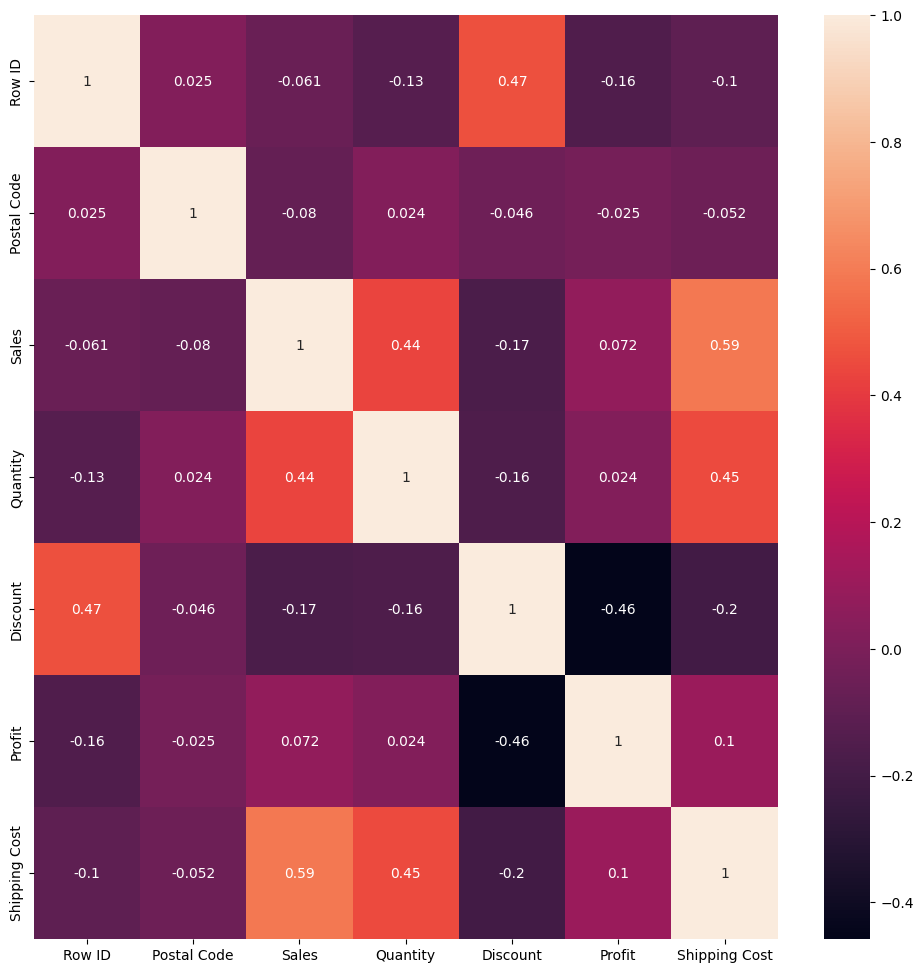

In [4]:
corr_matrix = data.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [3]:
select_country = ["Australia","Mexico","Canada","United States", "France","Nigeria","Turkey"]
select_subcate = ["Tables","Machines","Bookcases"]

data = datas[(datas['Country'].isin(select_country)) & (datas['Sub-Category'].isin(select_subcate))]

In [ ]:
coba=  data.groupby('Customer ID')['Order ID'].nunique().reset_index()
coba.head()
data = data.merge(coba, on='Customer ID', how='left')


In [36]:
data.head()

,Row ID,Order ID_x,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster,Order ID_y
0,40936,CA-2012-116638,2021-01-28,2021-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.40,-1862.3124,865.74,Critical,2,1
1,10648,ES-2012-5870268,2021-07-18,2021-07-20,First Class,BS-11365,Bill Shonely,Corporate,Saint-Brieuc,Brittany,...,Machines,"Okidata Inkjet, Wireless",2402.865,9,0.15,763.1550,699.55,Critical,1,3
2,32543,CA-2011-168494,2020-12-12,2020-12-14,Second Class,NP-18700,Nora Preis,Consumer,Fresno,California,...,Tables,Bretford Rectangular Conference Table Tops,3610.848,12,0.20,135.4068,683.12,High,1,2
3,36423,CA-2011-160766,2020-09-14,2020-09-14,Same Day,DM-13015,Darrin Martin,Consumer,New York City,New York,...,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.00,1371.9804,675.15,High,1,2
4,31980,US-2014-168116,2023-11-06,2023-11-06,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.50,-3839.9904,674.82,High,2,2


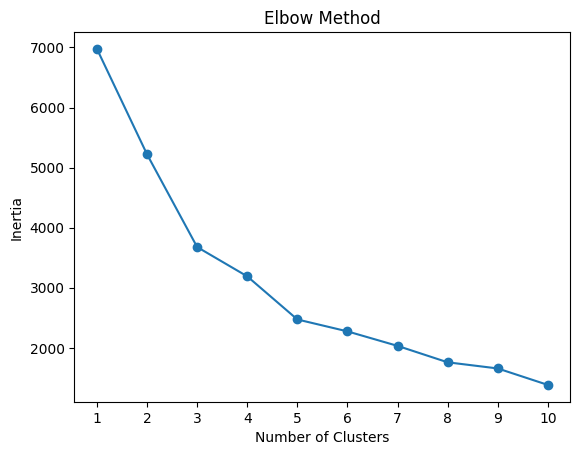

               Row ID   Postal Code        Sales  Quantity  Discount  \
Cluster                                                                
0        23497.520216  63516.861042   522.108060  3.434861  0.143261   
1        39274.897331  46063.570681   338.723943  2.944559  0.559487   
2        26538.965278  49829.686567  2563.256938  6.354167  0.151875   

             Profit  Shipping Cost  Order ID_y  
Cluster                                         
0         47.225575      50.933328    2.732255  
1       -231.717698      32.272998    2.073922  
2        255.120924     298.054531    2.611111  
Silhouette Score: 0.4827
Davies-Bouldin Index: 0.9129


In [62]:
features = ["Sales",'Shipping Cost','Profit', 'Discount'] 



# Scale the data for clustering
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data[features])

# Elbow Method to Find the Optimal Number of Clusters

inertia = [] 
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(scaled_data) 
    inertia.append(kmeans.inertia_) 

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o') 
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks (range(1,11))
plt.show()


# Apply K-Means Clustering (assume k= 3 based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data) 

# Add cluster labels to dataframe
data['Cluster'] = clusters

# Group by Cluster and Calculate the Mean for Only Numeric Columns

# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)


# sns.scatterplot(data=data, x='BMI', y='Fat_Percentage', hue='Cluster', palette='viridis')
# plt.title('Clustering of BMI and Fat Percentage')
# plt.xlabel('BMI')
# plt.ylabel('Fat Percentage')
# plt.show()

# Silhouette Score

sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index

db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")




In [63]:
data.groupby('Cluster').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Discount': 'mean',
    'Shipping Cost':'mean'
}).reset_index()

,Cluster,Profit,Sales,Discount,Shipping Cost
0,0,52562.0653,581106.2711,0.143261,50.933328
1,1,-112846.5191,164958.5601,0.559487,32.272998
2,2,36737.4130,369108.9991,0.151875,298.054531


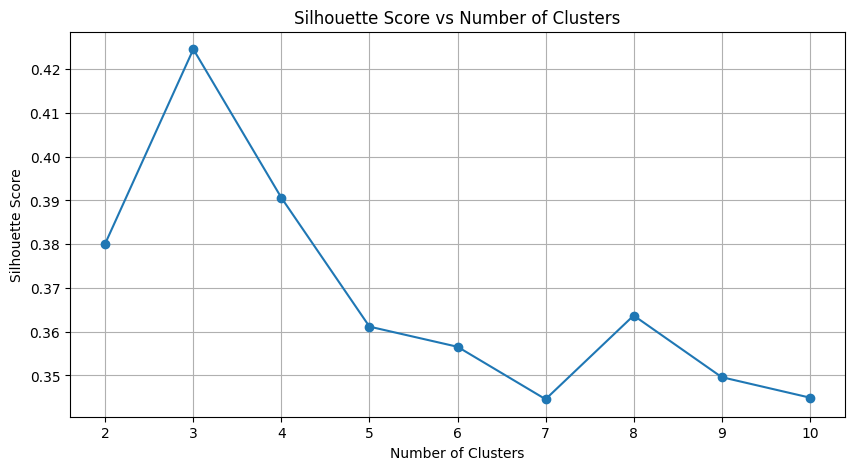

In [4]:

# Trying different values of k for KMeans (1 to 10 clusters)
inertia = []
sil_scores = []

for k in range(2, 11):  # Start from 2 clusters up to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Calculate the Silhouette Score for each k
    sil_score = silhouette_score(scaled_data, clusters)
    sil_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
data[features].describe()



,BMI,Fat_Percentage
count,973.00,973.00
mean,24.91,24.98
std,6.66,6.26
min,12.32,10.00
25%,20.11,21.30
50%,24.16,26.20
75%,28.56,29.30
max,49.84,35.00


In [8]:
print(cluster_means[features])


          BMI  Fat_Percentage
Cluster                      
0       24.44           15.76
1       20.71           28.68
2       32.86           26.16
